<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2.1-Learning-from-experts" data-toc-modified-id="2.1-Learning-from-experts-1">2.1 Learning from experts</a></span><ul class="toc-item"><li><span><a href="#Q11-Standard-training-with-fixed--$\epsilon$" data-toc-modified-id="Q11-Standard-training-with-fixed--$\epsilon$-1.1">Q11 Standard training with fixed  $\epsilon$</a></span></li><li><span><a href="#Q12-Training-without-the-replay-buffer-and-with-a-batch-size-of-1" data-toc-modified-id="Q12-Training-without-the-replay-buffer-and-with-a-batch-size-of-1-1.2">Q12 Training without the replay buffer and with a batch size of 1</a></span></li><li><span><a href="#Q13-Training-with-decreasing-$\epsilon$-given-different-values-of-$n*$" data-toc-modified-id="Q13-Training-with-decreasing-$\epsilon$-given-different-values-of-$n*$-1.3">Q13 Training with decreasing $\epsilon$ given different values of $n*$</a></span></li><li><span><a href="#Q14-Training-with-different-$\epsilon_{opt}$-given-best-value-of-$n*$" data-toc-modified-id="Q14-Training-with-different-$\epsilon_{opt}$-given-best-value-of-$n*$-1.4">Q14 Training with different $\epsilon_{opt}$ given best value of $n*$</a></span></li><li><span><a href="#Q15-Reporting-best-results" data-toc-modified-id="Q15-Reporting-best-results-1.5">Q15 Reporting best results</a></span></li></ul></li><li><span><a href="#2.2-Learning-by-self-practice" data-toc-modified-id="2.2-Learning-by-self-practice-2">2.2 Learning by self-practice</a></span><ul class="toc-item"><li><span><a href="#Q16-Training-with-different-fixed--$\epsilon$" data-toc-modified-id="Q16-Training-with-different-fixed--$\epsilon$-2.1">Q16 Training with different fixed  $\epsilon$</a></span></li><li><span><a href="#Q17-Training-with-decreasing--$\epsilon$-given-different-values-of-$n*$" data-toc-modified-id="Q17-Training-with-decreasing--$\epsilon$-given-different-values-of-$n*$-2.2">Q17 Training with decreasing  $\epsilon$ given different values of $n*$</a></span></li><li><span><a href="#Q18-Reporting-best-results" data-toc-modified-id="Q18-Reporting-best-results-2.3">Q18 Reporting best results</a></span></li><li><span><a href="#Q19-Visualizing-Q-values" data-toc-modified-id="Q19-Visualizing-Q-values-2.4">Q19 Visualizing Q values</a></span></li></ul></li></ul></div>

In [1]:
# std
import os
from typing import List, Dict, Tuple

# imported
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# customized
from tic_env import TictactoeEnv, OptimalPlayer
from dqn_player import DQNPlayer
from dqn_utils import *
from viz_utils import window_avg_plot, reward_loss_plots, metrics_plots

In [2]:
os.makedirs('plot', exist_ok=True)
os.makedirs('res', exist_ok=True)

In [3]:
# set up for plt
SMALL_SIZE = 14
MEDIUM_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

## 2.1 Learning from experts

In [4]:
val_interval=250

### Q11 Standard training with fixed  $\epsilon$ 

In [5]:
agent = DQNPlayer(epsilon=0.01, verbose=False)
expert = OptimalPlayer(0.5)
rewards, losses = agent.train(expert, nr_episodes=20000, val_interval=val_interval(10, 6))

100%|██████████| 20000/20000 [05:46<00:00, 57.72it/s] 


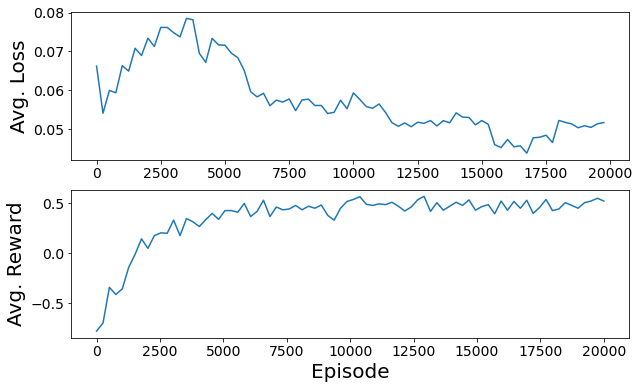

In [6]:
reward_loss_plots(rewards, losses)

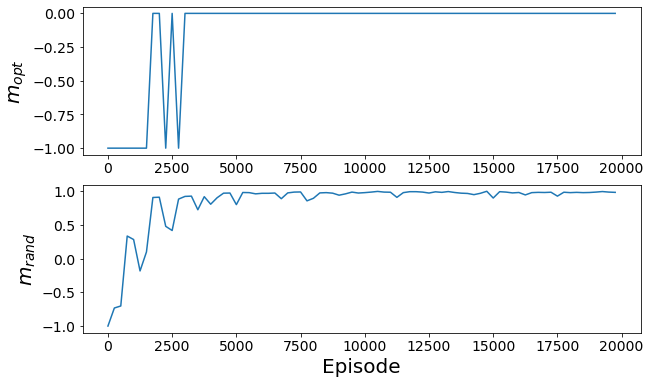

In [10]:
metrics_plots(agent.m_opts, agent.m_rands, val_interval=250)

In [12]:
sample_number = 6
epsilon_expert_list = []
for i in range(sample_number):
    epsilon_expert_list.append(i/(sample_number-1))

- test in different epsilon

In [ ]:
rewards_list = []
for epsilon in epsilon_list:
    agent = DQNPlayer(epsilon=epsilon, verbose=False)
    expert = OptimalPlayer(0.5)
    rewards = agent.learn(expert, nr_episodes=20000, val_interval=1000(10, 6))
    rewards_list.append(rewards)
    # include average_reward and losses
    # save_history(history)

In [ ]:
plt.figure(figsize = (9.6,7.2))
epsilon_list = [0.1, 0.3, 0.5, 0.7, 0.9]
average_reward = np.mean(np.array(history).reshape(80,250), axis=1)
for i, epsilon in enumerate(epsilon_list):
    plt.plot(np.arange(1,80+1)*250, average_reward[:,i], label = r"$\epsilon = {:.2f}$".format(epsilon))
plt.legend(loc = "upper left", ncol = 2, prop={'size': 8})
plt.xlabel("Number of games played")
plt.ylabel(r"Average reward")

### Q12 Training without the replay buffer and with a batch size of 1

In [ ]:
agent = DQNPlayer(epsilon=0.01, buffer_sz=1, batch_sz=1)
expert = OptimalPlayer(0.5)
rewards, losses = agent.learn(
    expert, nr_episodes=20000, val_interval=1000(10, 6)
)

### Q13 Training with decreasing $\epsilon$ given different values of $n*$

> Q13 Visualizing $M_{opt}$ and $M_{rand}$ over time

### Q14 Training with different $\epsilon_{opt}$ given best value of $n*$

> Q14 Visualizing $M_{opt}$ and $M_{rand}$ over time

### Q15 Reporting best results

## 2.2 Learning by self-practice

### Q16 Training with different fixed  $\epsilon$

### Q17 Training with decreasing  $\epsilon$ given different values of $n*$

### Q18 Reporting best results

### Q19 Visualizing Q values